## Regression: StatLib California Housing Data
http://www.dcc.fc.up.pt/~ltorgo/Regression/DataSets.html

** Dataset Information: **

This dataset contained 20,640 observations of information on the variables using all the block groups in California from the 1990 Census. In this sample a block group on average includes 1425.5 individuals living in a geographically compact area.

** Attribute Information: (6 features and 1 target)**

- housing Median Age
- total Rooms 
- total Bedrooms 
- population
- households
- median Income
- median House Value
 
** Objective of this project **

predict value of house based on the other features

## Data

In [68]:
#options(warn=-1)
# Load Data
df  <- read.csv('cal_housing_clean.csv')

In [69]:
# Inspect Data
head(df,3)
colnames(df)[7] <- 'label'

housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
41,880,129,322,126,8.3252,452600
21,7099,1106,2401,1138,8.3014,358500
52,1467,190,496,177,7.2574,352100


In [70]:
dim(df)

[1] 20640     7

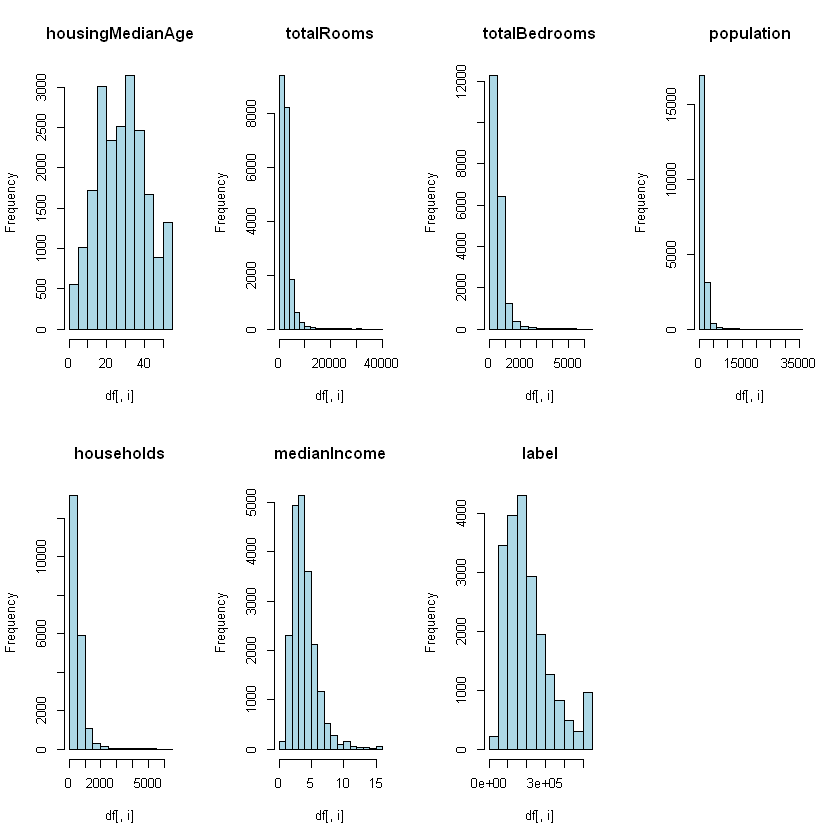

In [71]:
par(mfrow=c(2,4))
for(i in 1:7) {
    hist(df[,i], main=names(df)[i], col = 'lightblue')
}

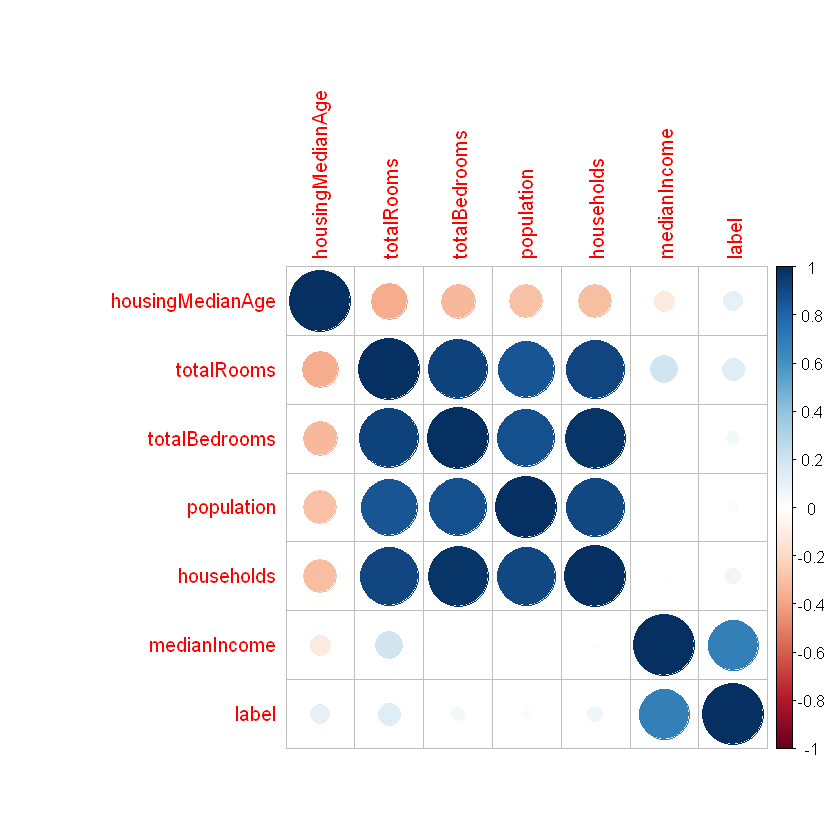

In [72]:
library(corrplot)
corrplot(cor(df), method="circle")

In [73]:
str(df)

'data.frame':	20640 obs. of  7 variables:
 $ housingMedianAge: num  41 21 52 52 52 52 52 52 42 52 ...
 $ totalRooms      : num  880 7099 1467 1274 1627 ...
 $ totalBedrooms   : num  129 1106 190 235 280 ...
 $ population      : num  322 2401 496 558 565 ...
 $ households      : num  126 1138 177 219 259 ...
 $ medianIncome    : num  8.33 8.3 7.26 5.64 3.85 ...
 $ label           : num  452600 358500 352100 341300 342200 ...


In [74]:
summary(df)

 housingMedianAge   totalRooms    totalBedrooms      population   
 Min.   : 1.00    Min.   :    2   Min.   :   1.0   Min.   :    3  
 1st Qu.:18.00    1st Qu.: 1448   1st Qu.: 295.0   1st Qu.:  787  
 Median :29.00    Median : 2127   Median : 435.0   Median : 1166  
 Mean   :28.64    Mean   : 2636   Mean   : 537.9   Mean   : 1425  
 3rd Qu.:37.00    3rd Qu.: 3148   3rd Qu.: 647.0   3rd Qu.: 1725  
 Max.   :52.00    Max.   :39320   Max.   :6445.0   Max.   :35682  
   households      medianIncome         label       
 Min.   :   1.0   Min.   : 0.4999   Min.   : 14999  
 1st Qu.: 280.0   1st Qu.: 2.5634   1st Qu.:119600  
 Median : 409.0   Median : 3.5348   Median :179700  
 Mean   : 499.5   Mean   : 3.8707   Mean   :206856  
 3rd Qu.: 605.0   3rd Qu.: 4.7432   3rd Qu.:264725  
 Max.   :6082.0   Max.   :15.0001   Max.   :500001  

In [75]:
any(is.na(df))

[1] FALSE

## Data preprocessing

In [76]:
library(caTools)
library(caret)
seed = 101 #random seed for reproducibility
set.seed(seed) 

** Split Train Test Sets **

In [113]:
split = sample.split(df$label, SplitRatio = 0.80)
train_set = subset(df, split == TRUE)
test_set = subset(df, split == FALSE)

In [114]:
label_col = 7
y_mean = mean(test_set[,label_col])
y_std = var(test_set[,label_col])^(0.5)

** Scale features **

In [115]:
# standardize data
train_set = scale(train_set)
test_set = scale(test_set)
summary(train_set)

 housingMedianAge     totalRooms      totalBedrooms       population     
 Min.   :-2.19492   Min.   :-1.2133   Min.   :-1.2776   Min.   :-1.2494  
 1st Qu.:-0.84637   1st Qu.:-0.5490   1st Qu.:-0.5777   1st Qu.:-0.5625  
 Median : 0.02622   Median :-0.2328   Median :-0.2431   Median :-0.2278  
 Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.66083   3rd Qu.: 0.2378   3rd Qu.: 0.2622   3rd Qu.: 0.2638  
 Max.   : 1.85072   Max.   :13.7609   Max.   :14.0120   Max.   :30.0120  
   households       medianIncome         label        
 Min.   :-1.3030   Min.   :-1.7665   Min.   :-1.6601  
 1st Qu.:-0.5760   1st Qu.:-0.6904   1st Qu.:-0.7588  
 Median :-0.2346   Median :-0.1782   Median :-0.2366  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.2762   3rd Qu.: 0.4633   3rd Qu.: 0.5078  
 Max.   :14.5437   Max.   : 5.7890   Max.   : 2.4990  

## Baseline Model

In [12]:
# cross validation
trControl <- trainControl(method="cv", number=3)
metric <- 'RMSE'

In [13]:
# train multiple models
# Linear Regression (Ordinary Least Squares;OLS) 
set.seed(seed)
fit.lm <- train(label~., data=train_set, method="lm", 
                 metric=metric, trControl=trControl)
# Partial Least Squares (PLS) Regression
set.seed(seed)
fit.pls <- train(label~., data=train_set, method="pls", 
                 metric=metric, trControl=trControl)
# Ridge
set.seed(seed)
fit.ridge <- train(label~., data=train_set, method="ridge", 
                 metric=metric, trControl=trControl)
# GLMNET (lasso, default alpha=1); Least Absolute Shrinkage and Selection Operator (LASSO)
set.seed(seed)
fit.glmnet <- train(label~., data=train_set, method="glmnet", 
                    metric=metric, trControl=trControl)
# SVM Radial (Support Vector Machine)
set.seed(seed)
fit.svmRadial <- train(label~., data=train_set, method="svmRadial", 
                       metric=metric, trControl=trControl, fit=FALSE)
# kNN
set.seed(seed)
fit.knn <- train(label~., data=train_set, method="knn", 
                 metric=metric, trControl=trControl)

# Bagged MARS (Multivariate Adaptive Regression Splines) 
set.seed(seed)
fit.bagEarth <- train(label~., data=train_set, method="bagEarth", 
                metric=metric, trControl=trControl)
# CART
set.seed(seed)
fit.cart <- train(label~., data=train_set, method="rpart", 
                  metric=metric, trControl=trControl)
# Bagged CART
set.seed(seed)
fit.treebag <- train(label~., data=train_set, method="treebag", 
                     metric=metric, trControl=trControl)
# Random Forest
set.seed(seed)
fit.rf <- train(label~., data=train_set, method="rf", 
                metric=metric, trControl=trControl)
# Stochastic Gradient Boosting
set.seed(seed)
fit.gbm <- train(label~., data=train_set, method="gbm", 
                 metric=metric, trControl=trControl, verbose=FALSE)


Call:
summary.resamples(object = results)

Models: linear, pls, ridge, glmnet, svm, knn, mars, cart, bagging, rf, gbm 
Number of resamples: 3 

MAE 
             Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
linear  0.4757839 0.4802213 0.4846588 0.4821443 0.4853246 0.4859904    0
pls     0.5024287 0.5060810 0.5097332 0.5075567 0.5101207 0.5105081    0
ridge   0.4757940 0.4802339 0.4846737 0.4821570 0.4853385 0.4860033    0
glmnet  0.4763715 0.4807861 0.4852008 0.4826844 0.4858409 0.4864810    0
svm     0.3847717 0.3890968 0.3934220 0.3907415 0.3937264 0.3940309    0
knn     0.4266204 0.4325806 0.4385407 0.4355184 0.4399674 0.4413941    0
mars    0.4333155 0.4379315 0.4425476 0.4409864 0.4448219 0.4470962    0
cart    0.5606357 0.5634449 0.5662540 0.5656132 0.5681020 0.5699499    0
bagging 0.5184254 0.5213400 0.5242546 0.5235900 0.5261723 0.5280901    0
rf      0.4153188 0.4168395 0.4183602 0.4189809 0.4208120 0.4232637    0
gbm     0.4313833 0.4378079 0.4442325 0.4409377

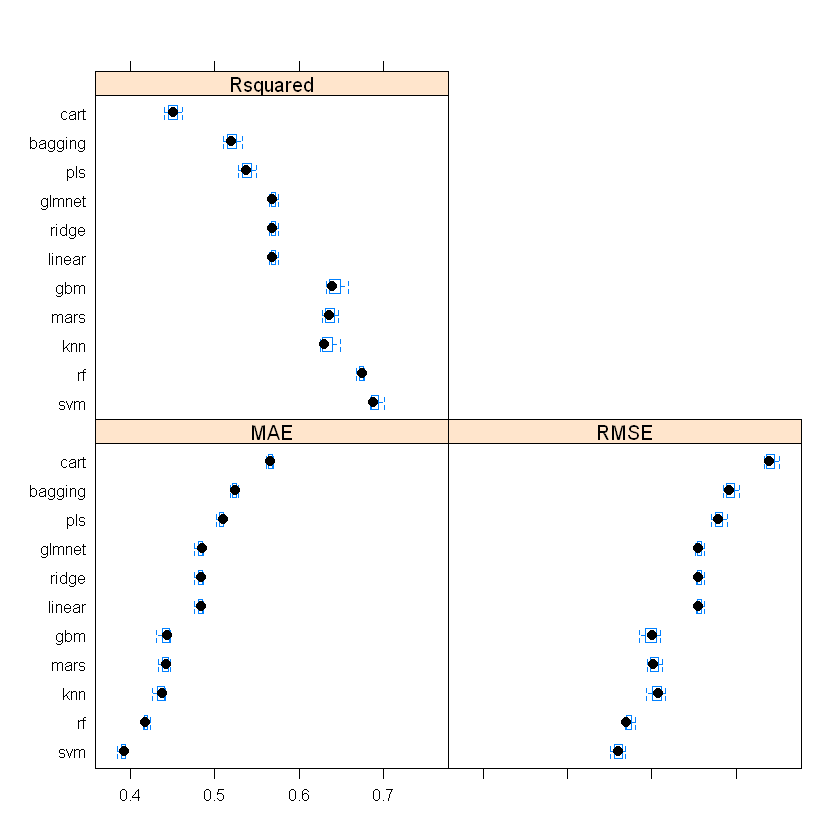

In [28]:
# summarise results
results <- resamples(list(linear=fit.lm, pls=fit.pls, ridge=fit.ridge,
                          glmnet=fit.glmnet, svm=fit.svmRadial, knn=fit.knn,
                          mars=fit.bagEarth, cart=fit.cart, bagging=fit.treebag,
                          rf=fit.rf, gbm=fit.gbm))
summary(results)
bwplot(results)

## Parameter Tuning
4 best algorithms by mean RMSE: svm, rf, gbm, mars

tuning parameters: http://topepo.github.io/caret/available-models.html

In [29]:
trControl <- trainControl(method='cv', number=3)
metric <- 'RMSE'

#### Model 1. Support Vector Machine 

In [30]:
# default
fit.svmRadial

Support Vector Machines with Radial Basis Function Kernel 

16690 samples
    6 predictor

No pre-processing
Resampling: Cross-Validated (3 fold) 
Summary of sample sizes: 11127, 11125, 11128 
Resampling results across tuning parameters:

  C     RMSE       Rsquared   MAE      
  0.25  0.5672286  0.6831375  0.3970286
  0.50  0.5629338  0.6877634  0.3931489
  1.00  0.5601285  0.6907740  0.3907415

Tuning parameter 'sigma' was held constant at a value of 0.3995815
RMSE was used to select the optimal model using the smallest value.
The final values used for the model were sigma = 0.3995815 and C = 1.

Support Vector Machines with Radial Basis Function Kernel 

16690 samples
    6 predictor

No pre-processing
Resampling: Cross-Validated (3 fold) 
Summary of sample sizes: 11127, 11125, 11128 
Resampling results across tuning parameters:

  sigma      RMSE       Rsquared   MAE      
  0.3995815  0.5601331  0.6907733  0.3907388
  0.5000000  0.5601242  0.6907361  0.3908979
  1.0000000  0.5656166  0.6841964  0.3959095

Tuning parameter 'C' was held constant at a value of 1
RMSE was used to select the optimal model using the smallest value.
The final values used for the model were sigma = 0.5 and C = 1.


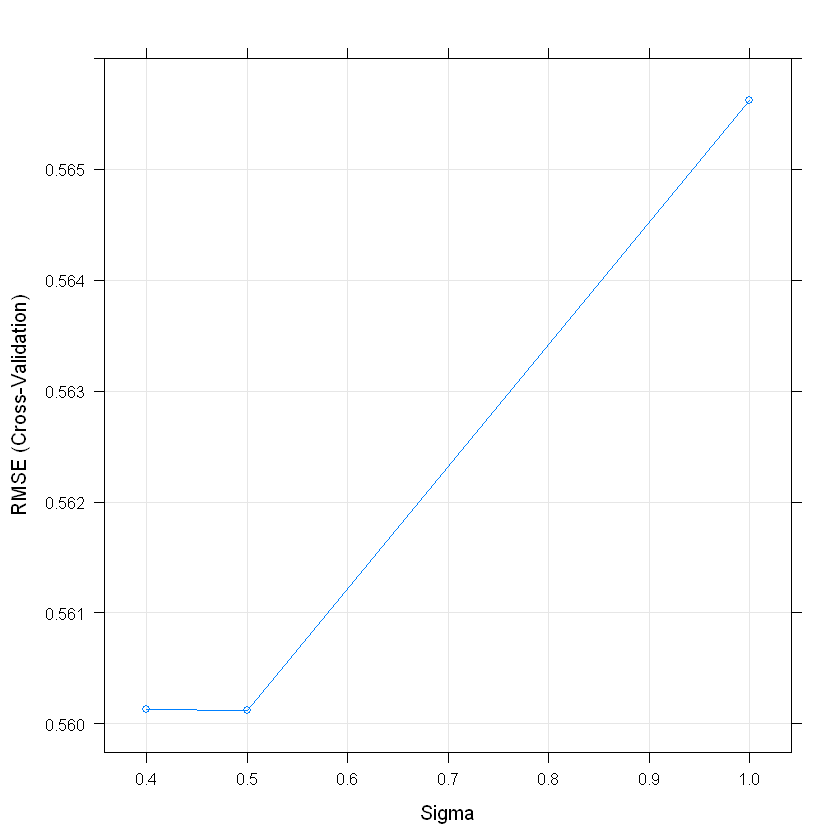

In [39]:
# grid search
set.seed(seed)
tuneGrid = expand.grid(.sigma=c(0.3995815,0.5,1), .C=1)
gridSearch <- train(label~., data=train_set, method='svmRadial',
                 metric=metric, trControl=trControl,
                 tuneGrid=tuneGrid)
print(gridSearch)
plot(gridSearch)

#### Model 2: Random Forest

In [31]:
# default
fit.rf

Random Forest 

16690 samples
    6 predictor

No pre-processing
Resampling: Cross-Validated (3 fold) 
Summary of sample sizes: 11127, 11125, 11128 
Resampling results across tuning parameters:

  mtry  RMSE       Rsquared   MAE      
  2     0.5731922  0.6734487  0.4189809
  4     0.5748360  0.6697792  0.4165872
  6     0.5791212  0.6646901  0.4191220

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was mtry = 2.

Random Forest 

16690 samples
    6 predictor

No pre-processing
Resampling: Cross-Validated (3 fold) 
Summary of sample sizes: 11127, 11125, 11128 
Resampling results across tuning parameters:

  mtry  RMSE       Rsquared   MAE      
  1     0.5930523  0.6613574  0.4428777
  2     0.5732612  0.6733752  0.4189319
  3     0.5731454  0.6720764  0.4160197

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was mtry = 3.


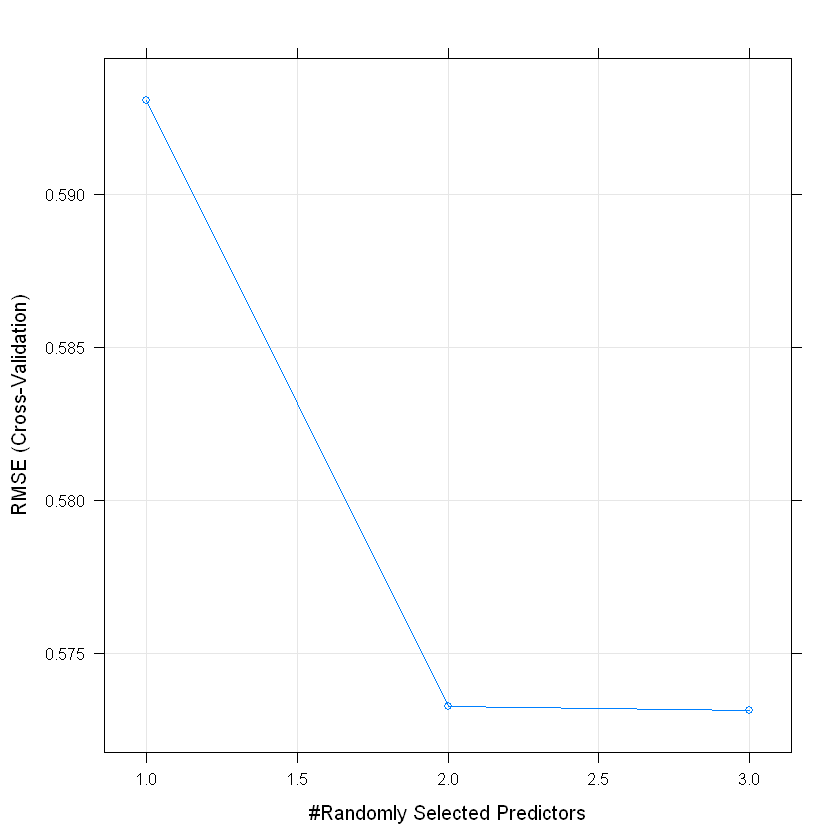

In [37]:
# grid search
set.seed(seed)
tuneGrid = expand.grid(.mtry=c(1,2,3))
gridSearch <- train(label~., data=train_set, method='rf',
                 metric=metric, trControl=trControl,
                 tuneGrid=tuneGrid)
print(gridSearch)
plot(gridSearch)

#### Model 2: Stochastic Gradient Boosting

In [32]:
# default
fit.gbm

Stochastic Gradient Boosting 

16690 samples
    6 predictor

No pre-processing
Resampling: Cross-Validated (3 fold) 
Summary of sample sizes: 11127, 11125, 11128 
Resampling results across tuning parameters:

  interaction.depth  n.trees  RMSE       Rsquared   MAE      
  1                   50      0.6966664  0.5280213  0.5303831
  1                  100      0.6702894  0.5555727  0.5032642
  1                  150      0.6585568  0.5696993  0.4923093
  2                   50      0.6619798  0.5692379  0.4979131
  2                  100      0.6307197  0.6054379  0.4695351
  2                  150      0.6143473  0.6246128  0.4557659
  3                   50      0.6430955  0.5922225  0.4817197
  3                  100      0.6133430  0.6261655  0.4551673
  3                  150      0.5984117  0.6431632  0.4409377

Tuning parameter 'shrinkage' was held constant at a value of 0.1

Tuning parameter 'n.minobsinnode' was held constant at a value of 10
RMSE was used to select the optima

Stochastic Gradient Boosting 

16690 samples
    6 predictor

No pre-processing
Resampling: Cross-Validated (3 fold) 
Summary of sample sizes: 11127, 11125, 11128 
Resampling results across tuning parameters:

  shrinkage  interaction.depth  n.minobsinnode  n.trees  RMSE       Rsquared 
  0.01       1                  10              150      0.7774827  0.4724127
  0.01       1                  10              300      0.7252975  0.5007740
  0.01       1                  10              500      0.6973578  0.5282378
  0.01       1                  20              150      0.7775410  0.4724402
  0.01       1                  20              300      0.7253173  0.5012239
  0.01       1                  20              500      0.6974673  0.5278766
  0.01       3                  10              150      0.7209332  0.5258234
  0.01       3                  10              300      0.6709733  0.5630391
  0.01       3                  10              500      0.6434207  0.5921151
  0.01    

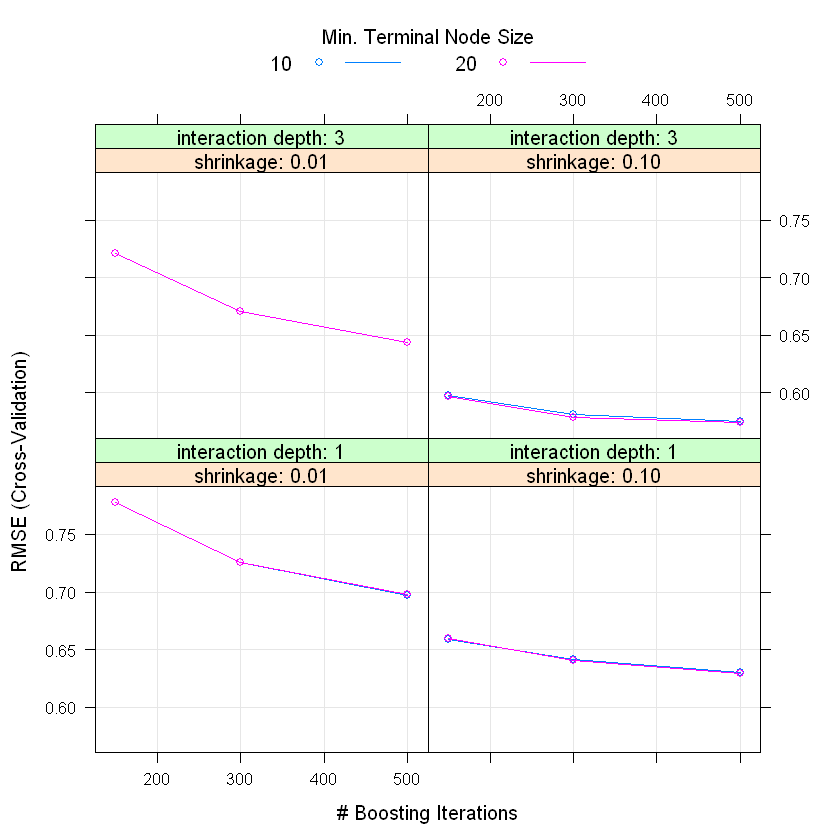

In [36]:
# grid search
set.seed(seed)
tuneGrid <- expand.grid(n.trees = c(150,300,500),
                       interaction.depth = c(1, 3),
                       shrinkage = c(0.01,0.1),
                       n.minobsinnode = c(10,20))
gridSearch <- train(label~., data=train_set, method='gbm',
                 metric=metric, trControl=trControl,
                 tuneGrid=tuneGrid, verbose=FALSE)
print(gridSearch)
plot(gridSearch)

#### Model 4: Bagged MARS

In [33]:
# default
fit.bagEarth

Bagged MARS 

16690 samples
    6 predictor

No pre-processing
Resampling: Cross-Validated (3 fold) 
Summary of sample sizes: 11127, 11125, 11128 
Resampling results across tuning parameters:

  nprune  RMSE       Rsquared   MAE      
   2      0.7177397  0.4850721  0.5381894
   8      0.6168342  0.6195566  0.4535584
  14      0.6030023  0.6364341  0.4409864

Tuning parameter 'degree' was held constant at a value of 1
RMSE was used to select the optimal model using the smallest value.
The final values used for the model were nprune = 14 and degree = 1.

Bagged MARS 

16690 samples
    6 predictor

No pre-processing
Resampling: Cross-Validated (3 fold) 
Summary of sample sizes: 11127, 11125, 11128 
Resampling results across tuning parameters:

  degree  nprune  RMSE       Rsquared   MAE      
  1        14     0.6032432  0.6361566  0.4412359
  1        30     0.6022202  0.6373690  0.4402854
  1        50     0.6021462  0.6374518  0.4401903
  1       100     0.6021572  0.6374310  0.4402579
  2        14     0.5911400  0.6505961  0.4316612
  2        30     0.5899141  0.6520096  0.4300072
  2        50     0.5906891  0.6511153  0.4301386
  2       100     0.5901719  0.6516968  0.4298950

RMSE was used to select the optimal model using the smallest value.
The final values used for the model were nprune = 30 and degree = 2.


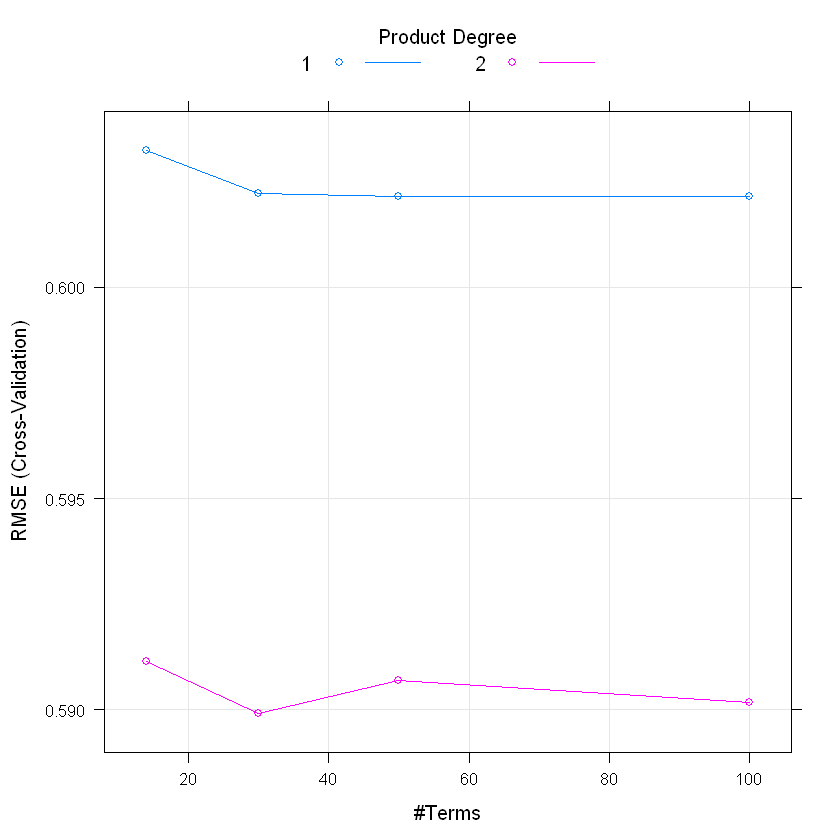

In [34]:
# grid search
set.seed(seed)
tuneGrid = expand.grid(nprune = c(14,30,50,100), degree = c(1,2))                       
gridSearch <- train(label~., data=train_set, method='bagEarth',
                 metric=metric, trControl=trControl,
                 tuneGrid=tuneGrid)
print(gridSearch)
plot(gridSearch)

## Final Model: Support Vector Machine (SVM)

#### Params: sigma = 0.5 and C = 1

In [134]:
library(kernlab)
set.seed(seed)
final.model <- ksvm(label~., data=train_set, kernel="rbfdot",
                    kpar=list(sigma=0.5), C=1)
print(final.model)

Support Vector Machine object of class "ksvm" 

SV type: eps-svr  (regression) 
 parameter : epsilon = 0.1  cost C = 1 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  0.5 

Number of Support Vectors : 13188 

Objective Function Value : -4880.333 
Training error : 0.289889 


#### Save and load the final model

In [137]:
# save the model to disk
saveRDS(final.model, 'final_model.rds')
#rm(final.model)

In [138]:
# load the model
final.model <- readRDS('final_model.rds')
print(final.model)

Support Vector Machine object of class "ksvm" 

SV type: eps-svr  (regression) 
 parameter : epsilon = 0.1  cost C = 1 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  0.5 

Number of Support Vectors : 13188 

Objective Function Value : -4880.333 
Training error : 0.289889 


#### Final Model Evaluation with Test set

In [139]:
# make predictions
predictions <- predict(fit.svmRadial, test_set[,1:6])
# evaluate the model
postResample(pred = predictions, obs = test_set[,label_col])

RMSE  Rsquared       MAE 
0.5801238 0.6697830 0.4029454

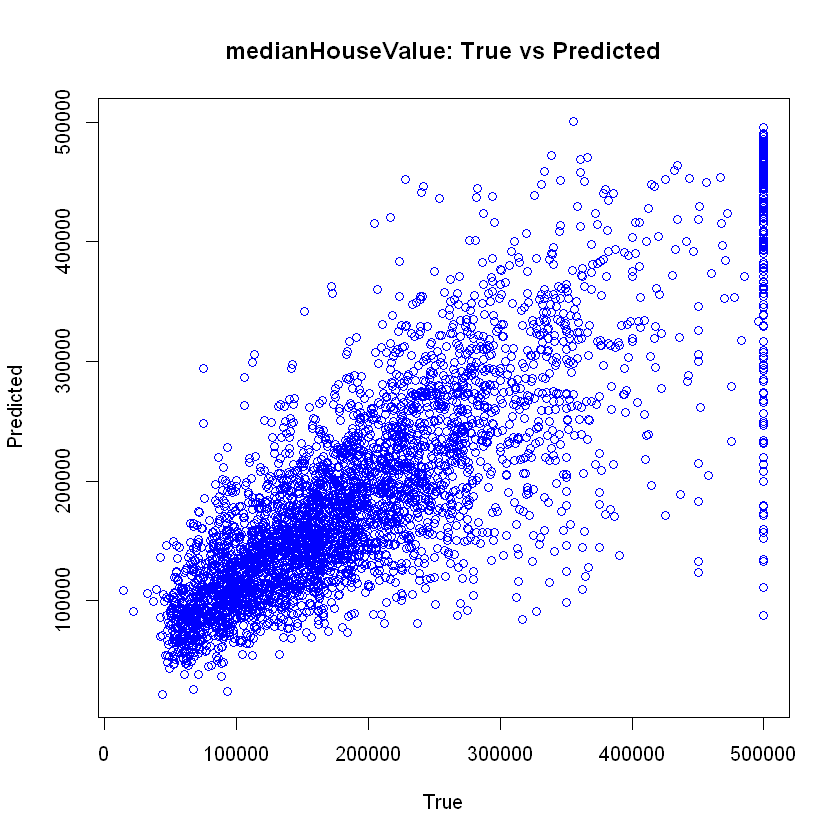

In [140]:
opt <- options("scipen" = 20)
options(opt)
plot(x = (test_set[,label_col] * y_std + y_mean), 
     y = (predictions * y_std + y_mean),  
     col = 'blue',  
     xlab = 'True', ylab = 'Predicted',
     main='medianHouseValue: True vs Predicted')

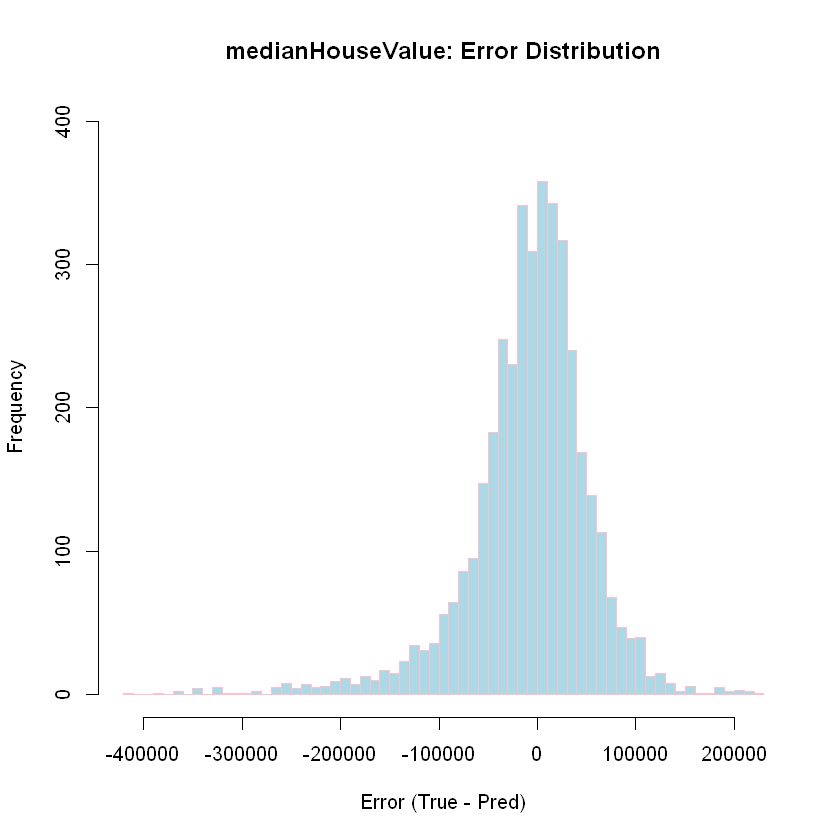

In [141]:
hist((predictions-test_set[,label_col]) * y_std,
     breaks = 50,
     col = 'lightblue', border = 'pink',
     xlab = 'Error (True - Pred)',
     main='medianHouseValue: Error Distribution',
     ylim = c(0,400))

## Summary

- Best model: **SVM** w/ param: sigma=0.5, C=1


- RMSE / R2 score of test set: ** 0.580 / 0.670 **